# Разведывательный анализ чистых данных

### 1 Загрузка данных и подключение библиотек

In [42]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [14]:
import warnings
warnings.filterwarnings('ignore')

Константы

In [15]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

In [16]:
GROUP_CLEAN = 'ПР'

Загружаем справочники

In [17]:
DOCS_DOMAIN_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'domain.xlsx')
DOCS_PHYLUM_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'phylum.xlsx')
DOCS_CLASS_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'class.xlsx')
DOCS_ORDER_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'order.xlsx')
DOCS_FAMILY_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'family.xlsx')
DOCS_SPECIES_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'species.xlsx')

DOCS_FULL_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'full.xlsx')

In [18]:
df_domain = pd.read_excel(DOCS_DOMAIN_PATH)
df_phylum = pd.read_excel(DOCS_PHYLUM_PATH)
df_class = pd.read_excel(DOCS_CLASS_PATH)
df_order = pd.read_excel(DOCS_ORDER_PATH)
df_family = pd.read_excel(DOCS_FAMILY_PATH)
df_species = pd.read_excel(DOCS_SPECIES_PATH)

df_docs = pd.read_excel(DOCS_FULL_PATH)

In [19]:
df_docs.head()

,id_species,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,1,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,2,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,3,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,4,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,5,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


Загружаем данные для анализа

In [20]:
DATA_CLEAN_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data.xlsx')
DATA_CLEAN_UNWRAP_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data_unwrap.xlsx')

In [21]:
df_clean = pd.read_excel(DATA_CLEAN_PATH)
df_clean_unwrap = pd.read_excel(DATA_CLEAN_UNWRAP_PATH)

In [22]:
df_clean.head()

,group,number,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,1,0,0,0,5,0,0,77,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,2,0,0,5,10,0,0,95,3,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,1,0,0,3,0,0,0,22,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,2,10,0,0,0,0,0,23,0,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,1,0,4,3,0,0,0,19,0,...,8,0,323,8,6,0,0,0,0,0


In [23]:
df_clean_unwrap.head()

,group,number,id_species,colonies
0,ПР,1,1,0
1,ПР,1,2,0
2,ПР,1,3,0
3,ПР,1,4,5
4,ПР,1,5,0


In [24]:
df_species.head()

,id,id_family,name
0,1,1,Arthrobacter
1,2,1,Galactobacter
2,3,2,Corynebacterium
3,4,3,Adlercreutzia
4,5,3,Gordonibacter


Соединяем по всем справочникам

In [25]:
df_clean_unwrap_docs = df_clean_unwrap.merge(df_docs, on=['id_species'], how='left')
df_clean_unwrap_docs.head()

,group,number,id_species,colonies,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,ПР,1,1,0,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,ПР,1,2,0,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,ПР,1,3,0,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,ПР,1,4,5,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,ПР,1,5,0,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


### 2 Анализ макро-характеристик

Ссылка на [цвета](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py) для отрисовки

Посмотрим какие признакми можно убрать из анализа где количество колони равно 0

In [26]:
df_clean.sum(axis=0)[lambda x: x == 0]

Paraeggerthella                       0
Sarcina                               0
Clostridium sensu stricto             0
Clostridium XlVa                      0
Faecalimonas                          0
Terrisporobacter                      0
unclassified_Peptostreptococcaceae    0
Turicibacter                          0
dtype: object

Запомним строки чтобы в дальнейшем исключить их из анализа

In [27]:
ZEROS_FEATURES = list(df_clean.groupby(by=['group']).mean().sum(axis=0)[lambda x: x == 0].index)
ZEROS_FEATURES

['Paraeggerthella',
 'Sarcina',
 'Clostridium sensu stricto',
 'Clostridium XlVa',
 'Faecalimonas',
 'Terrisporobacter',
 'unclassified_Peptostreptococcaceae',
 'Turicibacter']

#### 2.1 График среднего числа колоний по группам

In [28]:
df_clean

,group,number,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,1,0,0,0,5,0,0,77,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,2,0,0,5,10,0,0,95,3,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,1,0,0,3,0,0,0,22,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,2,10,0,0,0,0,0,23,0,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,1,0,4,3,0,0,0,19,0,...,8,0,323,8,6,0,0,0,0,0
5,Целлюлоза,2,0,0,0,0,0,0,73,0,...,0,15,77,11,0,0,0,0,3,3
6,Лакт,1,0,0,0,11,4,0,146,0,...,0,0,350,5,12,0,0,0,0,0
7,Лакт,2,0,0,0,0,0,0,98,5,...,8,31,35,0,3,0,0,0,12,0
8,Энтеросгель,1,0,0,0,8,6,0,128,0,...,3,8,47,0,0,0,0,0,0,0
9,Энтеросгель,2,0,0,3,16,33,0,238,23,...,5,188,331,12,8,0,0,32,21,0


group
Fe             23412.0
АУ             25420.0
Биф            23120.5
Лакт           27565.0
Медь           27549.0
ПДР            21102.0
ПР             25726.5
Спор           26073.5
Хит            23049.5
Целлюлоза      19473.5
Энтеросгель    27207.0
dtype: float64


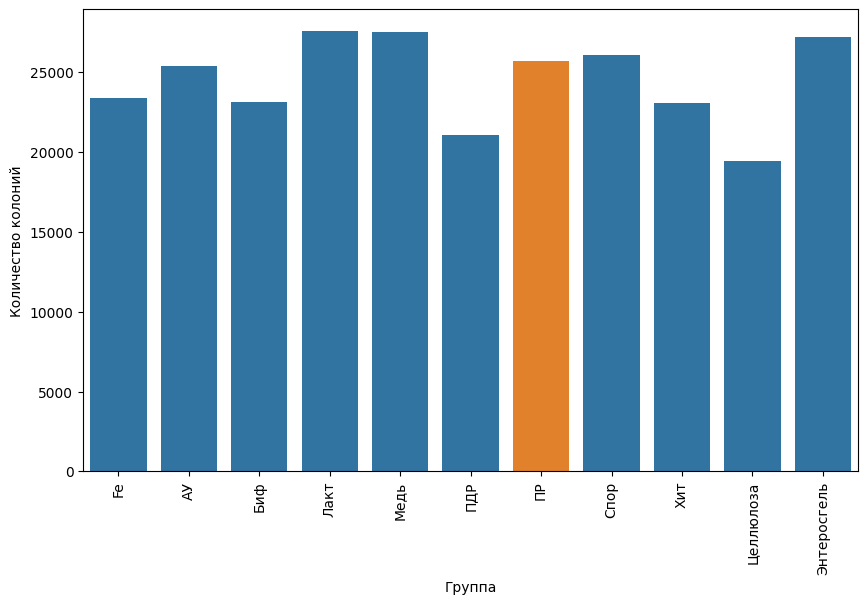

In [29]:
def plot_mean_sum_colonies_by_groups():
    group_counts = df_clean.drop(columns=['number']).groupby(by=['group']).mean().sum(axis=1)
    print(group_counts)
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.index]
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    ax.tick_params(axis='x', labelrotation=90)
    sns.barplot(y=group_counts.values, x=group_counts.index, ax=ax, palette=colors)
    None
plot_mean_sum_colonies_by_groups()

#### 2.2 Диаграмма размаха числа колоний по группам

          group    sum
15           Fe  17465
14           Fe  29359
10           АУ  21489
11           АУ  29351
17          Биф  30437
16          Биф  15804
6          Лакт  27277
7          Лакт  27853
13         Медь  27625
12         Медь  27473
2           ПДР  22663
3           ПДР  19541
0            ПР  17833
1            ПР  33620
18         Спор  23756
19         Спор  28391
20          Хит  21915
21          Хит  24184
5     Целлюлоза  21318
4     Целлюлоза  17629
9   Энтеросгель  31371
8   Энтеросгель  23043


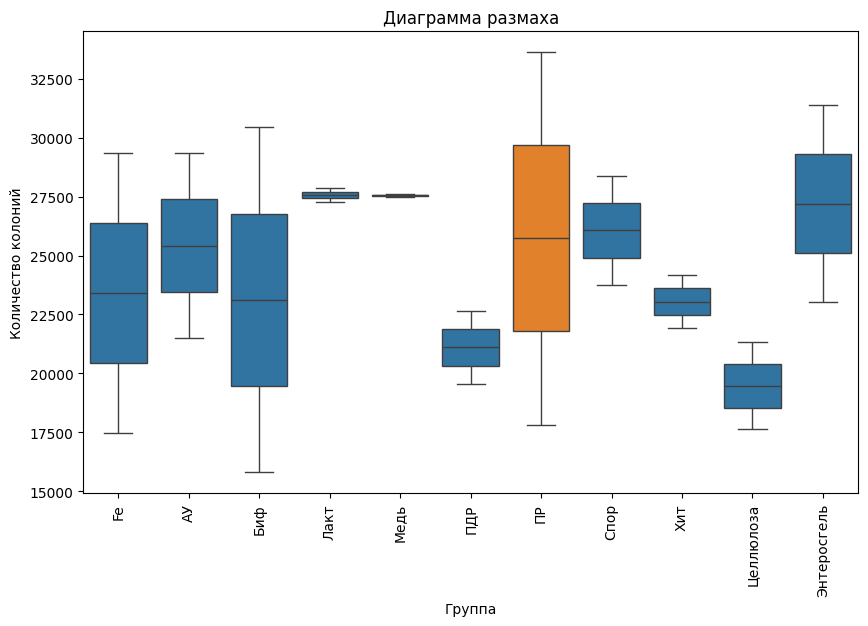

In [30]:
def plot_all_sum_colonies_by_groups():
    group_counts = df_clean[['group']]
    group_counts['sum'] = df_clean.drop(columns=['number']).sum(axis=1, numeric_only=True)
    group_counts = group_counts.sort_values(by=['group'])
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
    ax.tick_params(axis='x', labelrotation=90)
    print(group_counts)
    sns.boxplot(data=group_counts, x='group', y='sum', ax=ax, palette=colors)
    plt.title("Диаграмма размаха")
plot_all_sum_colonies_by_groups()

#### 2.3 Анализ по категориям групп бактерий

##### 2.3.1 Домены

In [40]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['domain'], aggfunc='sum').reset_index()

domain,group,number,Bacteria,Fungi
0,Fe,1,29359,0
1,Fe,2,17465,0
2,АУ,1,21489,0
3,АУ,2,29351,0
4,Биф,1,15804,0
5,Биф,2,30437,0
6,Лакт,1,27277,0
7,Лакт,2,27853,0
8,Медь,1,27473,0
9,Медь,2,27625,0


`Fungi` есть только для **Целлюлоза-2**, в целом по `Bacteria` будет совпадать с диаграммой размаха

##### 2.3.2 Филум

In [41]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()


phylum,group,number,Actinobacteria,Ascomycota,Bacteroidetes,Firmicutes,Proteobacteria,unclassified_Bacteria
0,Fe,1,21,0,18199,11000,134,5
1,Fe,2,17,0,7786,9317,340,5
2,АУ,1,13,0,11661,9784,31,0
3,АУ,2,28,0,19938,9172,213,0
4,Биф,1,26,0,6811,8434,533,0
5,Биф,2,83,0,15797,13692,858,7
6,Лакт,1,161,0,17777,8972,367,0
7,Лакт,2,103,0,16562,11099,77,12
8,Медь,1,59,0,19231,6615,1564,4
9,Медь,2,54,0,18686,8533,348,4


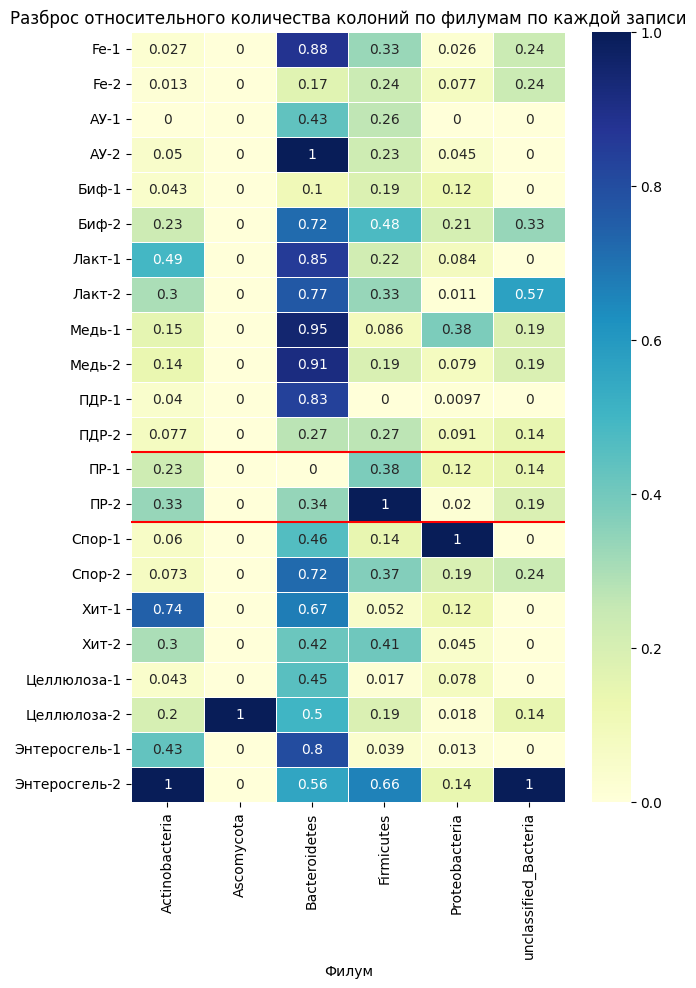

In [ ]:
def plot_heatmap_colonies_by_phylum():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['phylum'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = table['group'] + '-' + table['number'].astype('str')
   
    x_labels = list(table_filter.columns)
    fig, ax = plt.subplots(figsize=(7, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Филум')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по филумам по каждой записи")
plot_heatmap_colonies_by_phylum()

##### 2.3.3 Класс

In [61]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class'], aggfunc='sum').reset_index()

class,group,number,Actinobacteria,Alphaproteobacteria,Bacilli,Bacteroidia,Betaproteobacteria,Clostridia,Coriobacteriia,Deltaproteobacteria,Dothideomycetes,Erysipelotrichia,Gammaproteobacteria,unclassified_Bacteria,unclassified_Firmicutes
0,Fe,1,0,3,5228,18199,8,5279,21,68,0,404,55,5,89
1,Fe,2,5,0,2350,7786,4,6840,12,3,0,107,333,5,20
2,АУ,1,5,0,1314,11661,0,8451,8,6,0,8,25,0,11
3,АУ,2,10,8,2013,19938,35,6872,18,21,0,254,149,0,33
4,Биф,1,5,3,5669,6811,0,2662,21,27,0,82,503,0,21
5,Биф,2,15,62,5090,15797,203,8440,68,163,0,84,430,7,78
6,Лакт,1,0,0,1743,17777,0,7067,161,0,0,92,367,0,70
7,Лакт,2,0,0,2889,16562,8,7849,103,31,0,299,38,12,62
8,Медь,1,14,41,1759,19231,0,4654,45,52,0,52,1471,4,150
9,Медь,2,9,12,3947,18686,7,4485,45,36,0,60,293,4,41


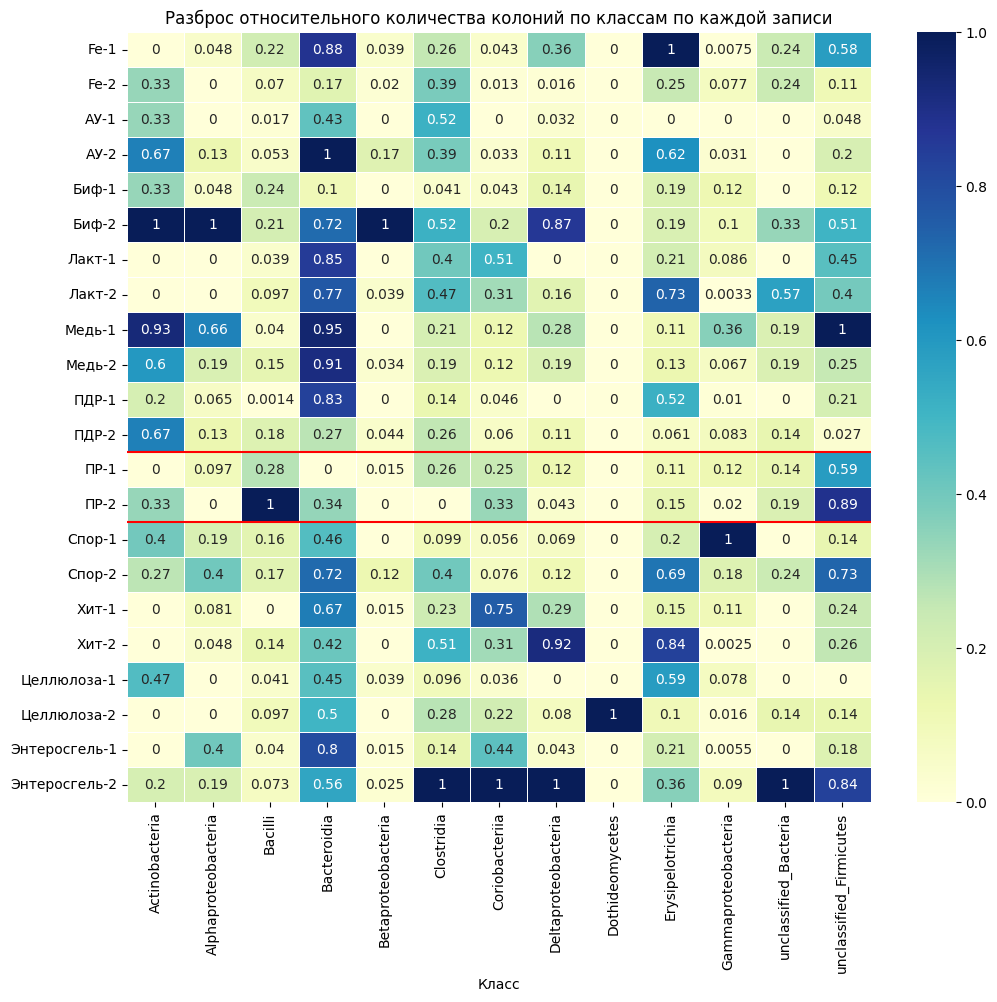

In [ ]:
def plot_heatmap_colonies_by_class():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = table['group'] + '-' + table['number'].astype('str')
    x_labels = list(table_filter.columns)
    fig, ax = plt.subplots(figsize=(12, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Класс')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10) 
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по классам по каждой записи")
plot_heatmap_colonies_by_class()

##### 2.3.4 Порядок

In [64]:
pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['class'], aggfunc='sum').reset_index()

class,group,number,Actinobacteria,Alphaproteobacteria,Bacilli,Bacteroidia,Betaproteobacteria,Clostridia,Coriobacteriia,Deltaproteobacteria,Dothideomycetes,Erysipelotrichia,Gammaproteobacteria,unclassified_Bacteria,unclassified_Firmicutes
0,Fe,1,0,3,5228,18199,8,5279,21,68,0,404,55,5,89
1,Fe,2,5,0,2350,7786,4,6840,12,3,0,107,333,5,20
2,АУ,1,5,0,1314,11661,0,8451,8,6,0,8,25,0,11
3,АУ,2,10,8,2013,19938,35,6872,18,21,0,254,149,0,33
4,Биф,1,5,3,5669,6811,0,2662,21,27,0,82,503,0,21
5,Биф,2,15,62,5090,15797,203,8440,68,163,0,84,430,7,78
6,Лакт,1,0,0,1743,17777,0,7067,161,0,0,92,367,0,70
7,Лакт,2,0,0,2889,16562,8,7849,103,31,0,299,38,12,62
8,Медь,1,14,41,1759,19231,0,4654,45,52,0,52,1471,4,150
9,Медь,2,9,12,3947,18686,7,4485,45,36,0,60,293,4,41


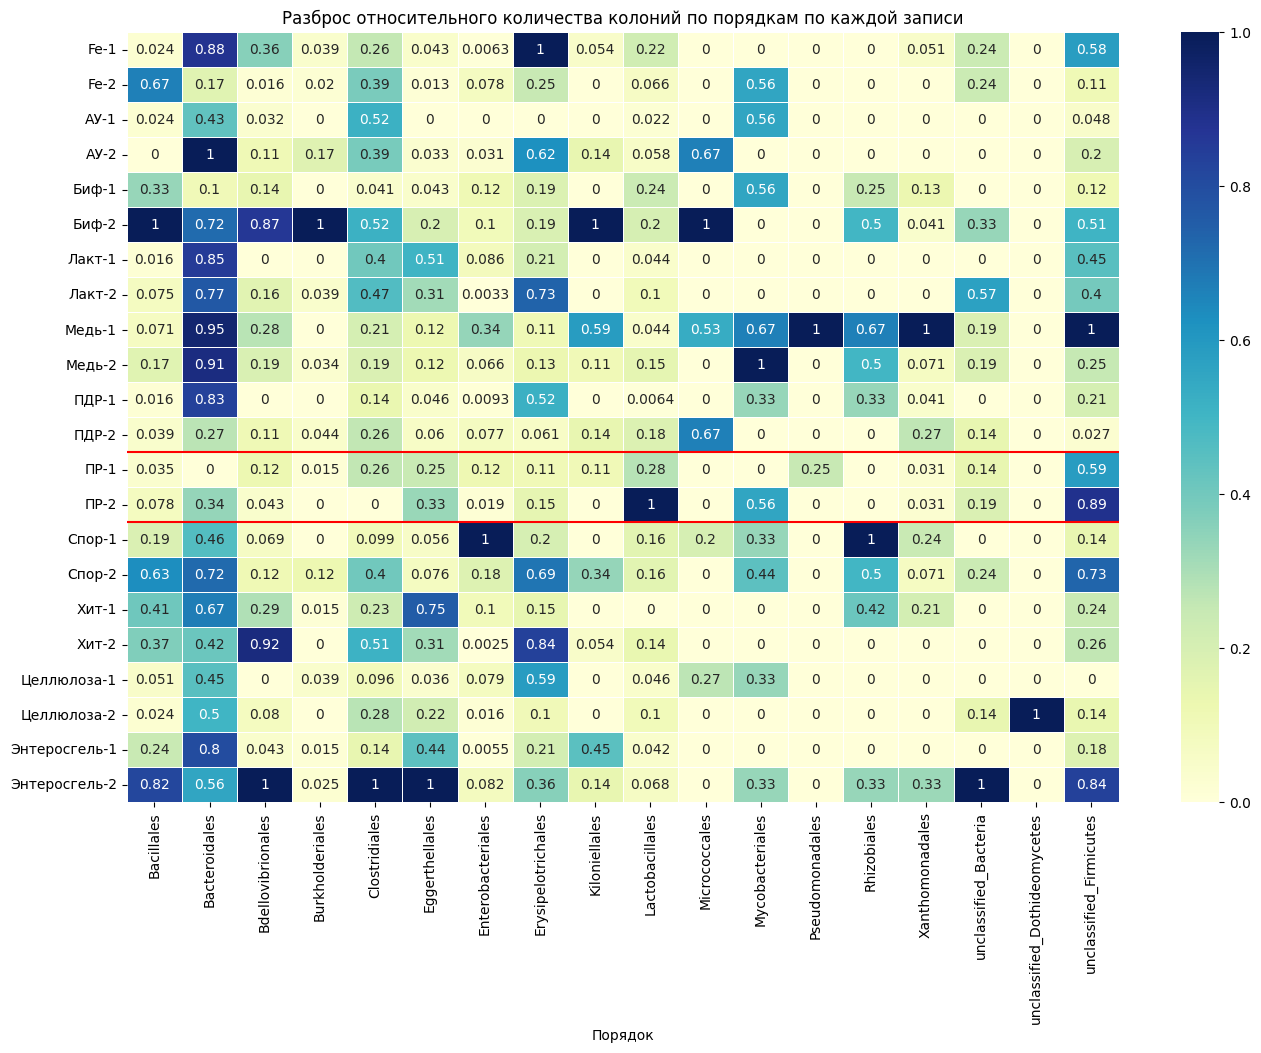

In [ ]:
def plot_heatmap_colonies_by_class():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group', 'number'], columns=['order'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['group', 'number'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter)
    y_labels = table['group'] + '-' + table['number'].astype('str')
    x_labels = list(table_filter.columns)
    fig, ax = plt.subplots(figsize=(16, 10))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidths=0.5)
    axes.set_xlabel('Порядок')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = list(table['group']).index(GROUP_CLEAN)
    if index_target != -1:
        axes.axhline(y=index_target, linewidth=1.5, color="red")
        axes.axhline(y=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по порядкам по каждой записи")
plot_heatmap_colonies_by_class()

##### 2.3.5 Семейство

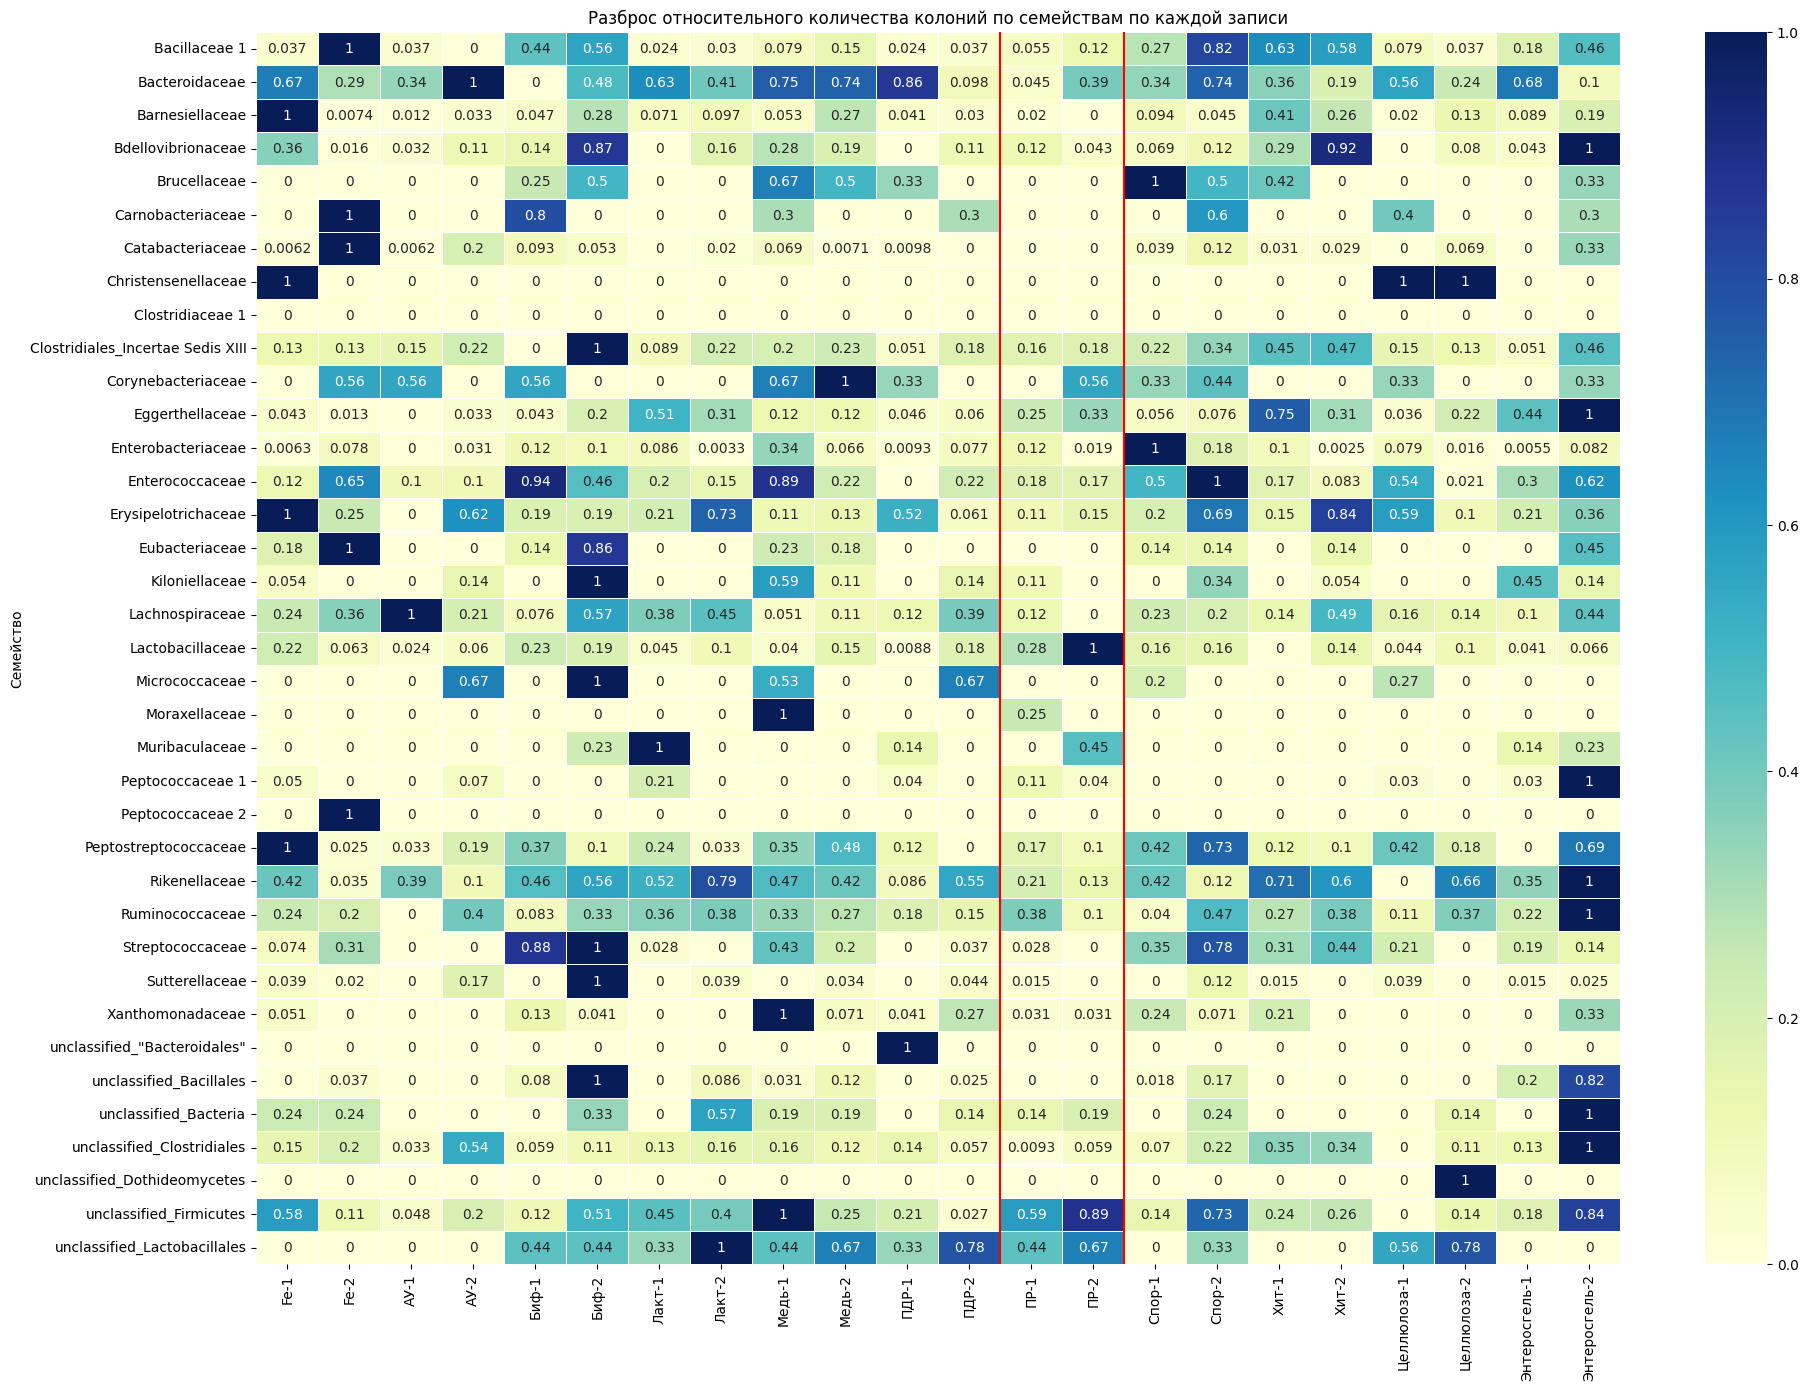

In [119]:
def plot_heatmap_colonies_by_family():
    table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['family'], columns=['group', 'number'], aggfunc='sum').reset_index()
    table_filter = table.drop(columns=['family'])
    scaler = MinMaxScaler()
    table_filter_scale = scaler.fit_transform(table_filter.T).T
    y_labels = list(table['family'].values)
    x_labels = [f'{x[0]}-{str(x[1])}' for x in table_filter.columns]
    fig, ax = plt.subplots(figsize=(22, 16))
    axes = sns.heatmap(data=table_filter_scale, ax=ax, cmap='YlGnBu', annot=True, linewidth=.5)
    axes.set_ylabel('Семейство')
    axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
    axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
    # Ищем ПР в лейблах
    index_target = [x[0] for x in table_filter.columns].index(GROUP_CLEAN)
    if index_target != -1:
        axes.axvline(x=index_target, linewidth=1.5, color="red")
        axes.axvline(x=index_target+2, linewidth=1.5, color="red")
    plt.title("Разброс относительного количества колоний по семействам по каждой записи")
plot_heatmap_colonies_by_family()